<a href="https://colab.research.google.com/github/obeabi/SdsNovember2020Challenge/blob/main/Main_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #3 - Fraudulent Job Adverts
## 2021-01-19

## Data Preprocessing

In [1]:
# Import category_encoders package
!pip install category_encoders

     |████████████████████████████████| 81kB 3.1MB/s 


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import  zscore
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries installed successfully!


In [3]:
# Importing the training dataset

df_train = pd.read_csv('public_jobs.csv', engine= 'python', encoding= 'latin1')

df_train.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Sales Professional - Buiding Products,"CA, BC, Langley",Langley,60000-90000,Great Customer Service from Start to FinishWha...,"Centra Windows an established, employee-owned ...",NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0
1,Senior Software Engineer,"GB, , London",Engineering,NaN,We believe cities are complicated. And your mo...,"Londoners, New Yorkers, Parisians, and Berline...",We're looking for someone with several years' ...,NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Engineering,0
2,Director of Operations (SCM & Manufacturing),"US, WA, Bellingham",Operations,50000-70000,POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,Extensive Mathematical and/or Financial Backgr...,"$50 - $70k DOE and Performance + Medical, 401k...",0,1,1,Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0
3,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,0-0,NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1
4,Data Entry Assistant - Intern,"HK, , Hong Kong",Marketing,8000-14000,"At Hayes-Corp, we create the fun stuff.Â With...","Hayes Corp is looking for a patient, meticulou...",Degree in any discipline.Familiar with Microso...,"Opportunity to grow with the company, as data ...",0,1,0,Other,Entry level,Bachelor's Degree,Internet,Marketing,0


In [4]:
# priniting the details about the train dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\nFeatures/Columns : \n", df_train.columns)
print("\n\nNumber of Features/Columns : ", len(df_train.columns))
print("\nNumber of Rows : ",len(df_train))
print("\n\nData Types :\n", df_train.dtypes)

print("\n Contains NaN/Empty cells : ", df_train.isnull().values.any())

print("\n Total empty cells by column :\n", df_train.isnull().sum(), "\n\n")

print("\n Perecentage of missing values in train datframe is: \n", str(100*(df_train.isnull().sum().sum()/(df_train.shape[0]* df_train.shape[1])))+'%')


EDA on Training Set

##############################

Features/Columns : 
 Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


Number of Features/Columns :  17

Number of Rows :  14304


Data Types :
 title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: objec

In [5]:
# Importing the test dataset

df_test = pd.read_csv('pred_jobs.csv', engine= 'python', encoding= 'latin1')

df_test.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Part-time Pizza Delivery Drivers - Wallasey,"GB, WRL, Wallasey",,NaN,Take Out Brands is a food franchise business w...,Papa Johnâs is one of the worldâs biggest ...,You must be 19 years old or above â and will...,Pay rates will be Â£6.31 / hour (21 and over)Â...,0,1,1,Part-time,Not Applicable,NaN,Retail,NaN
1,Director of Contact Center Operations,"US, AZ, Tempe",Operations,NaN,"J-Curve Technologies,Â a privately held Arizon...",J-Curve Technologies is currently in search of...,Experience and Education: Minimum of 5-8 years...,Full time employees enjoy a comprehensive bene...,0,1,1,Full-time,Not Applicable,NaN,NaN,Management
2,Technical Solution Consultant,"US, IL, Chicago",NaN,80000-105000,Retailers around the world are constantly work...,Job Title: Technical Solution ConsultantDepart...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
3,Vacancies At The Cafe Royal Hotel London,"GB, EAW, london",Hospitality,NaN,NaN,"AVAILABLE POSITIONS:Catering staffs, managers,...",Word Perfect;Typing;Public Speaking;Scheduling...,The Hotel Management would be responsible to c...,0,0,0,NaN,NaN,NaN,NaN,NaN
4,Car Dealer Sales Manager/Customer Service,"GR, I, Athens",NaN,NaN,Ilias Sotiropoulos first went into business as...,Full time Sales Manager/Customer Service for a...,Max 35 years old.Living close to the workplace...,NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Retail,Sales


In [6]:

# priniting the details about the test dataset

print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",len(df_test))
print("\n\nData Types :\n", df_test.dtypes)
print("\n Contains NaN/Empty cells : ", df_test.isnull().values.any())
print("\n Total empty cells by column :\n", df_test.isnull().sum())
print("\n Perecentage of missing values in test datframe is: \n", str(100*(df_test.isnull().sum().sum()/(df_test.shape[0]* df_test.shape[1])))+'%')

##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')


Number of Features/Columns :  16

Number of Rows :  3576


Data Types :
 title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
dtype: object

 Contains NaN/Empty ce

In [7]:
# Retrrieve information from train dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14304 non-null  object
 1   location             14029 non-null  object
 2   department           5122 non-null   object
 3   salary_range         2325 non-null   object
 4   company_profile      11651 non-null  object
 5   description          14303 non-null  object
 6   requirements         12155 non-null  object
 7   benefits             8546 non-null   object
 8   telecommuting        14304 non-null  int64 
 9   has_company_logo     14304 non-null  int64 
 10  has_questions        14304 non-null  int64 
 11  employment_type      11542 non-null  object
 12  required_experience  8674 non-null   object
 13  required_education   7837 non-null   object
 14  industry             10404 non-null  object
 15  function             9144 non-null   object
 16  frau

In [8]:
# Retrieve statistics of train dataframe
df_train.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,14304.000000,14304.000000,14304.000000,14304.000000
mean,0.043554,0.794393,0.492799,0.049567
std,0.204108,0.404158,0.499966,0.217055
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


## EDA

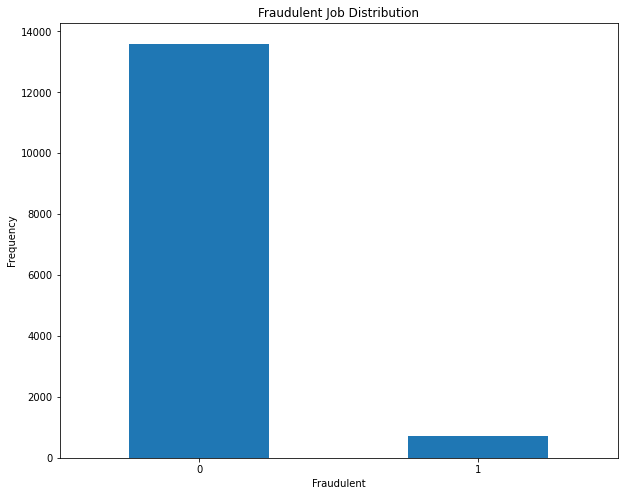

In [9]:
# Let's visualize the distribution of data
count_classes = pd.value_counts(df_train['fraudulent'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Fraudulent Job Distribution")
plt.xticks(range(2))
plt.xlabel("Fraudulent")
plt.ylabel('Frequency')
plt.show()

In [10]:
# Investigate the counts of differebt classes
df_train['fraudulent'].value_counts()

0    13595
1      709
Name: fraudulent, dtype: int64

#### The distribution above shows that the dataset is imbalanced

In [11]:
# Extract numerical and categorical columns from train dataframe
numerical_cols = [cname for cname in df_train.columns if
                df_train[cname].dtype in ['int64', 'float64']]

# Extract categorical features from dataframe
category_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]
category_features = category_cols.copy()
category_cols.append('fraudulent')

# Create individual dataframes
num_train= df_train[numerical_cols].copy()
cat_train = df_train[category_cols].copy()

num_train.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,0,0,1
4,0,1,0,0


### Exploring numerical attributes and target column

In [12]:
# Check for missing values in train dataframe
num_train.isnull().sum()

telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [13]:
# Investigae basic statistics
df_train.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,14304.000000,14304.000000,14304.000000,14304.000000
mean,0.043554,0.794393,0.492799,0.049567
std,0.204108,0.404158,0.499966,0.217055
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [14]:
# Check how the varaibles classify jobs as fraud or not fraud ( results show that company logo and has questions are useful indicators)
target_column = 'fraudulent'

# For classification problem
num_train.groupby(target_column).mean() # Not a complete picture

,telecommuting,has_company_logo,has_questions
fraudulent,,,
0,0.041854,0.818610,0.503126
1,0.076164,0.330042,0.294781


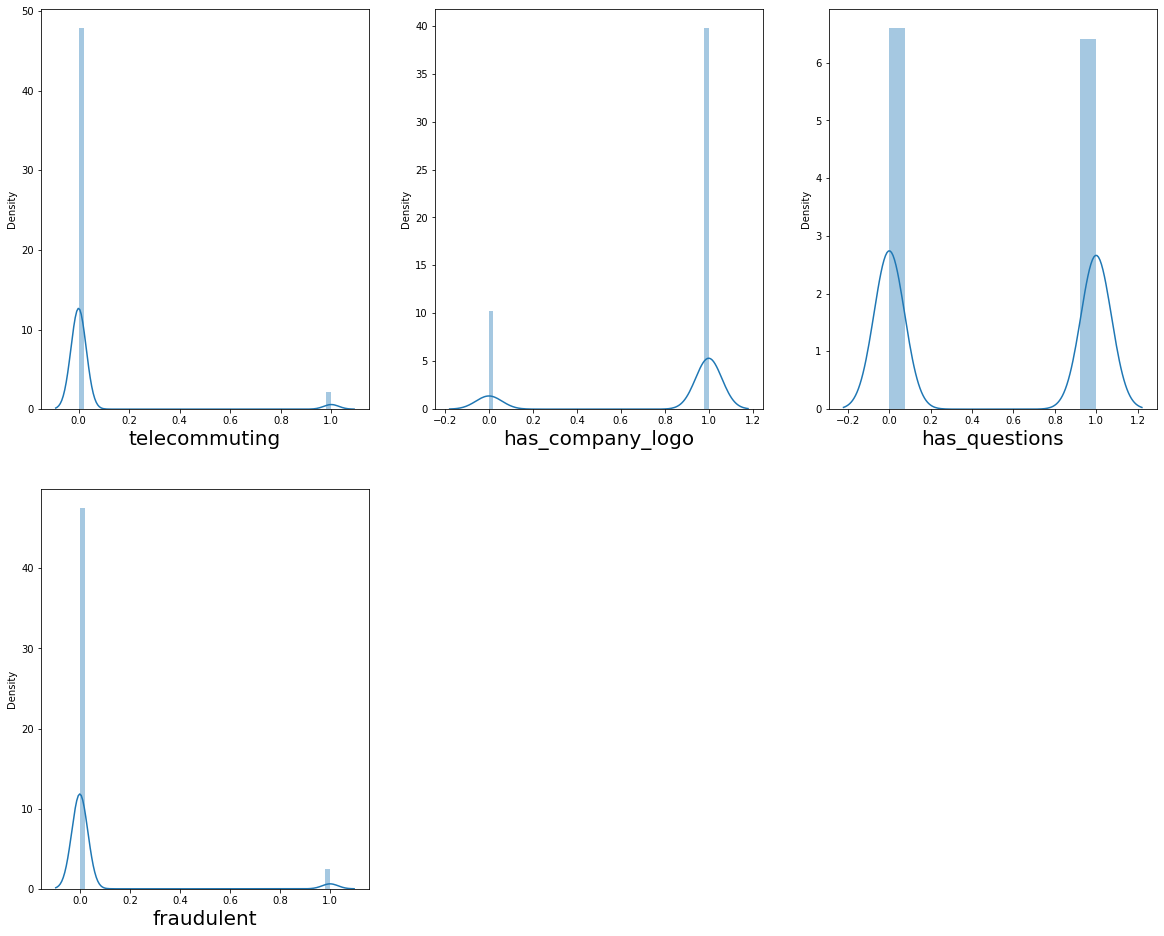

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_train:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(num_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

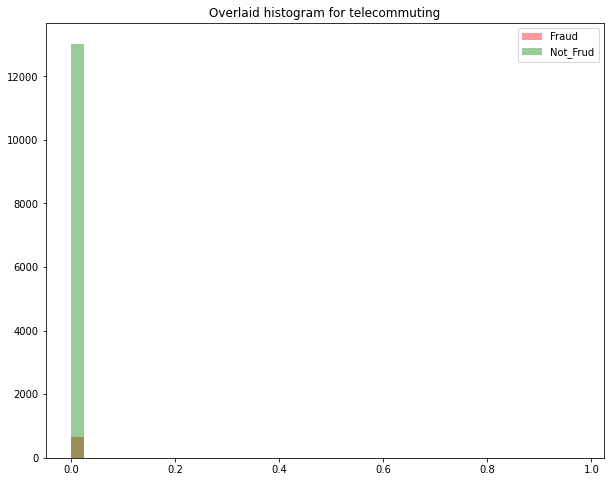

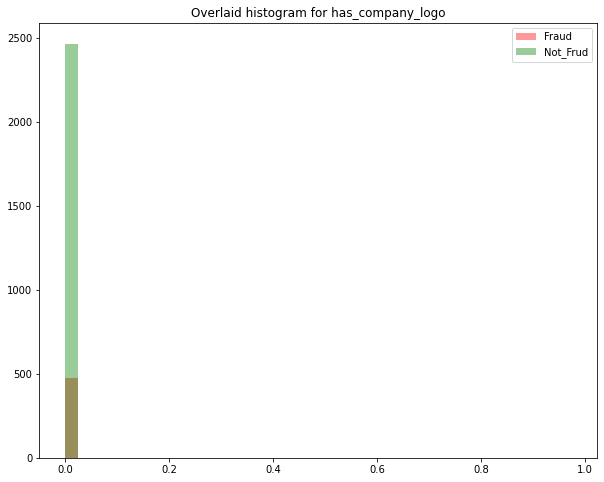

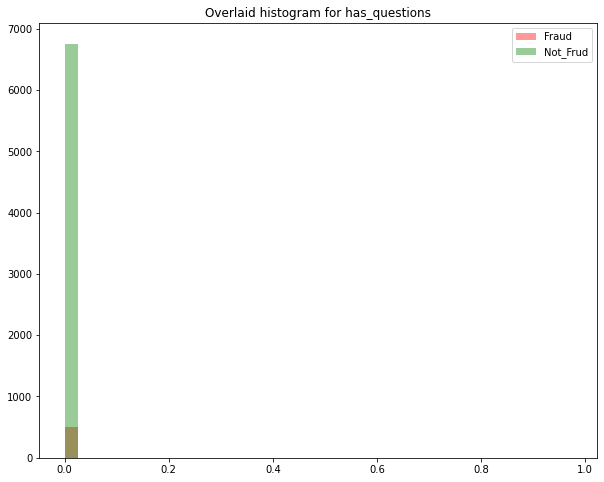

In [ ]:
# Explore dataset
for i in num_train.columns[:-1]:
    Fraud = list(num_train[num_train['fraudulent'] == 1][i].dropna())
    Not_Fraud = list(num_train[num_train['fraudulent']  == 0][i].dropna())
    xmin = min(min(Fraud), min(Not_Fraud))
    xmax = max(max(Fraud), max(Not_Fraud))
    width = (xmax - xmin) / 40
    sns.distplot(Fraud, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(Not_Fraud, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Fraud', 'Not_Frud'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 720x576 with 0 Axes>

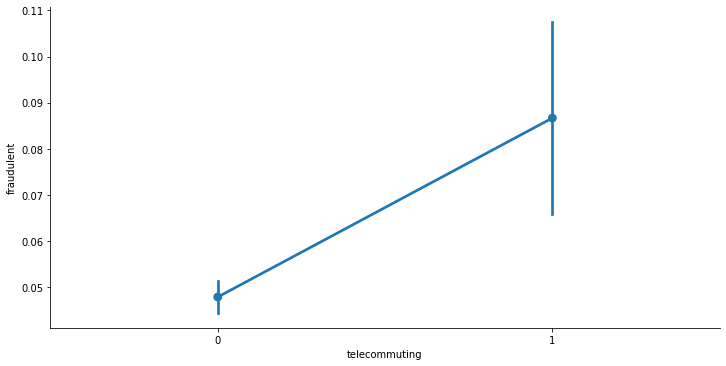

<Figure size 720x576 with 0 Axes>

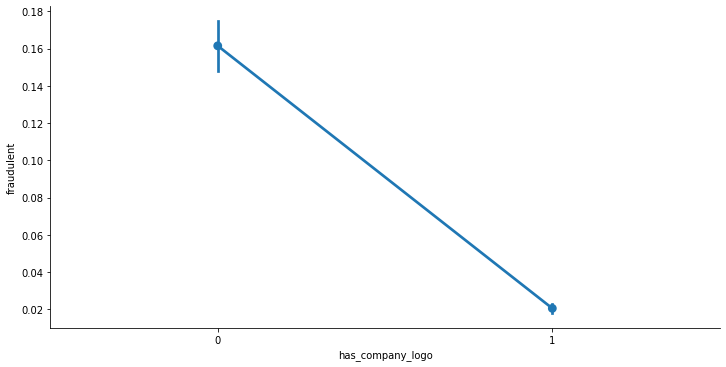

<Figure size 720x576 with 0 Axes>

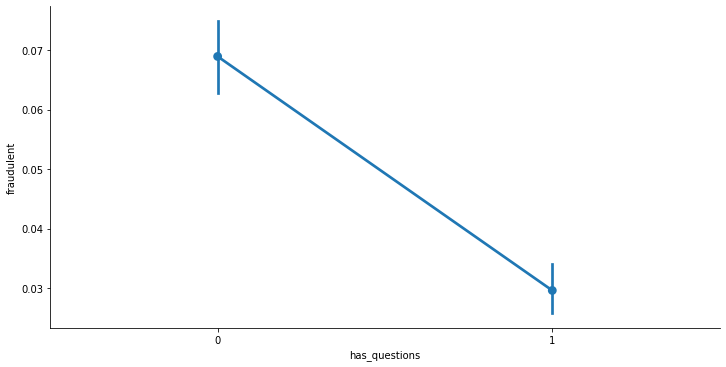

In [ ]:
# For the ordinal features
for i, col in enumerate(['telecommuting', 'has_company_logo', 'has_questions']):
    plt.figure(i)
    sns.catplot(x=col, y='fraudulent', data=num_train, kind='point', aspect=2,)
    plt.show()

In [ ]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)
  
  #diagnostic_plots(df,'Age') # how to use function
  
  plt.show()

<Figure size 720x576 with 0 Axes>

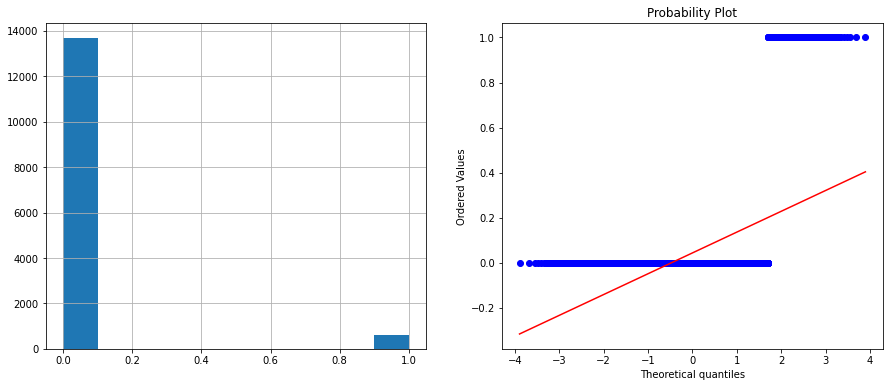

<Figure size 720x576 with 0 Axes>

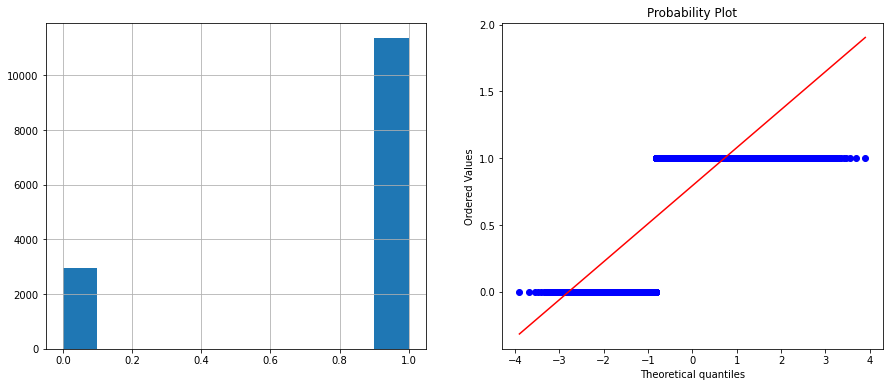

<Figure size 720x576 with 0 Axes>

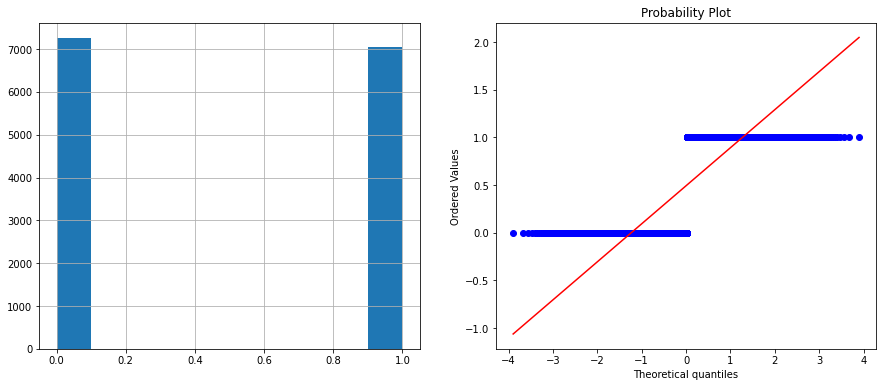

<Figure size 720x576 with 0 Axes>

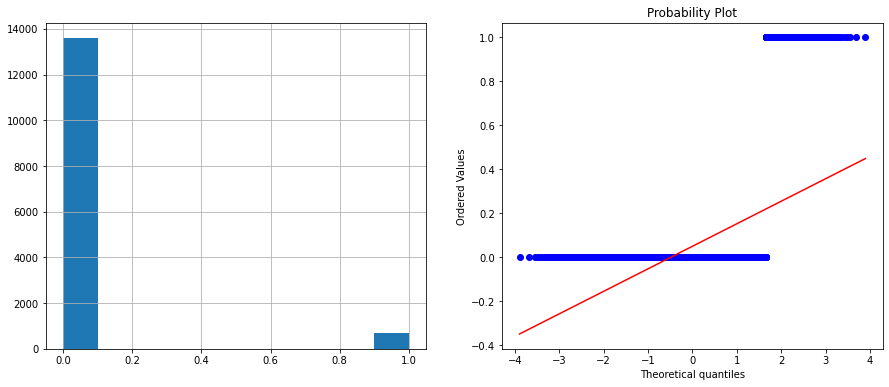

In [ ]:
# Confirm skewness with Q-Q plot for all numerical columns

for i,cols in enumerate(num_train.columns):
    plt.figure(i)
    diagnostic_plots(num_train, cols)
    plt.show()

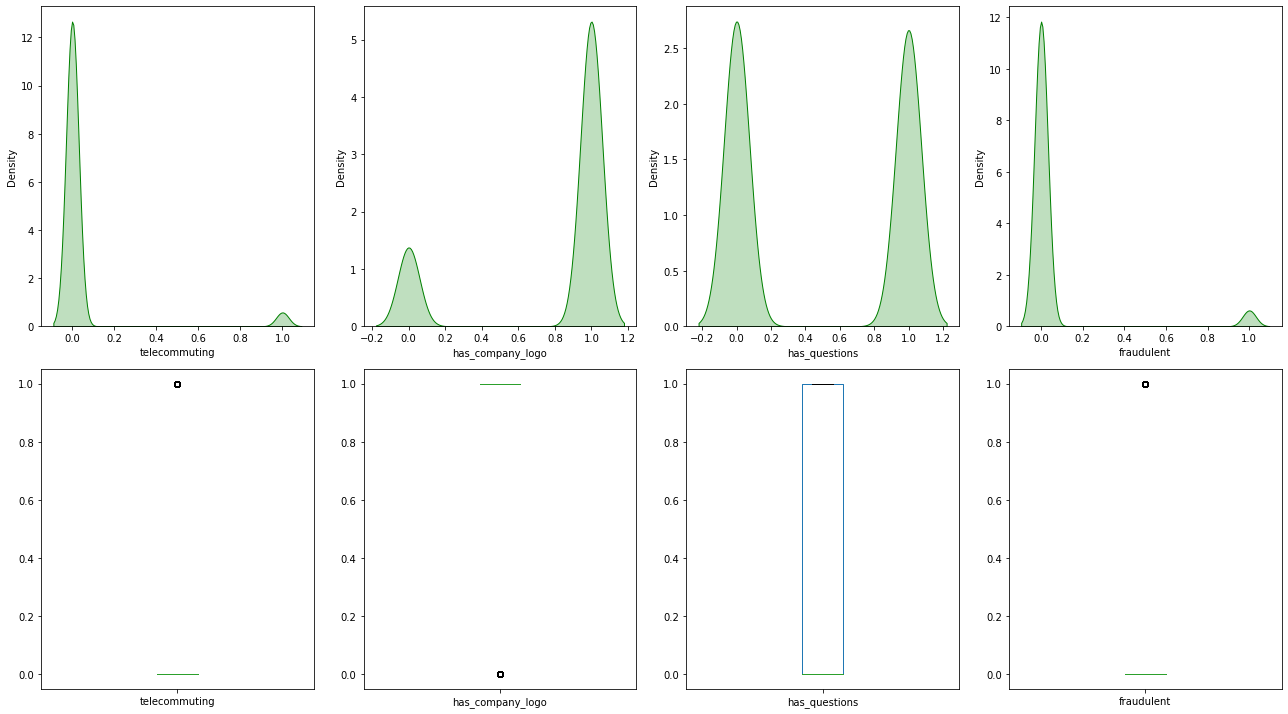

,telecommuting,has_company_logo,has_questions,fraudulent
skewness,4.473210,-1.457024,0.028809,4.150983
kurtosis,18.012124,0.122937,-1.999450,15.232789


In [ ]:
# Visual exploration of numerical colums
plt.figure(figsize= (18,40))
for i,col in enumerate(num_train.columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(num_train[col],color='g',shade=True)
    plt.subplot(8,4,i+len(num_train.columns))
    num_train[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = num_train[num_train.columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
# Print first five rows from test set dataframe for numerical columns
test_num_cols = numerical_cols[:-1]

num_test = df_test[test_num_cols].copy()
num_test.head()

,telecommuting,has_company_logo,has_questions
0,0,1,1
1,0,1,1
2,0,0,0
3,0,0,0
4,0,1,0


### Explore Categorical data

In [ ]:
# Examine dataset for categorical columns including target column
cat_train.head()
cat_test = df_test[category_features].copy()

In [ ]:
# Checking for missing values
cat_train.isnull().sum()

title                      0
location                 275
department              9182
salary_range           11979
company_profile         2653
description                1
requirements            2149
benefits                5758
employment_type         2762
required_experience     5630
required_education      6467
industry                3900
function                5160
fraudulent                 0
dtype: int64

In [ ]:
# Let us see the cardanilatity of each column for the categorical columns in train and test set
# Unique value sin each columns
for cols in category_features:
    print("Unique values in", cols,  "column in training data:", cat_train[cols].nunique())
    print("Unique values in", cols,  "column in test data:", cat_test[cols].nunique())
    print("*"*80)

Unique values in title column in training data: 9269
Unique values in title column in test data: 2772
********************************************************************************
Unique values in location column in training data: 2750
Unique values in location column in test data: 1195
********************************************************************************
Unique values in department column in training data: 1172
Unique values in department column in test data: 449
********************************************************************************
Unique values in salary_range column in training data: 765
Unique values in salary_range column in test data: 311
********************************************************************************
Unique values in company_profile column in training data: 1597
Unique values in company_profile column in test data: 899
********************************************************************************
Unique values in description column in 

In [ ]:
# Explore employment_type values
cat_train.employment_type.value_counts()

Full-time    9317
Contract     1216
Part-time     630
Temporary     191
Other         188
Name: employment_type, dtype: int64

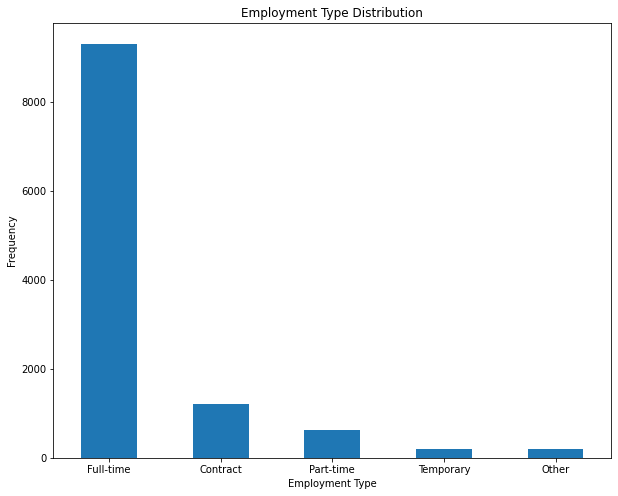

In [ ]:
# Let's visualize the distribution of employment_type column
count_classes = pd.value_counts(cat_train['employment_type'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Employment Type Distribution")
plt.xticks(range(5))
plt.xlabel("Employment Type")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Explore required_experience values
cat_train.required_experience.value_counts()

Mid-Senior level    3029
Entry level         2175
Associate           1844
Not Applicable       880
Director             318
Internship           312
Executive            116
Name: required_experience, dtype: int64

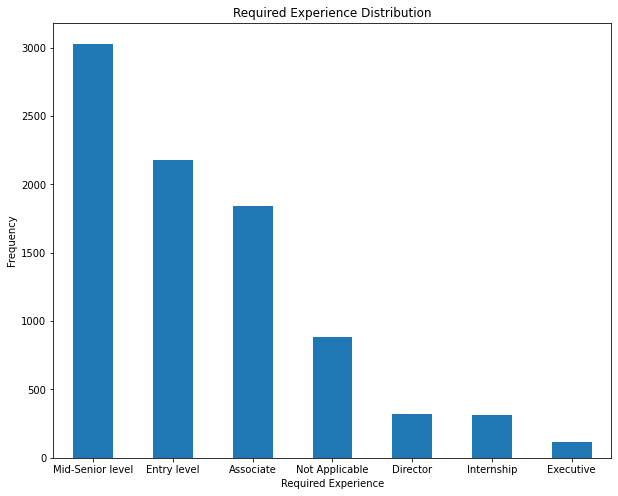

In [ ]:
# Let's visualize the distribution of required experience column
count_classes = pd.value_counts(cat_train['required_experience'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Required Experience Distribution")
plt.xticks(range(7))
plt.xlabel("Required Experience")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Explore required_education values
cat_train.required_education.value_counts()

Bachelor's Degree                    4096
High School or equivalent            1689
Unspecified                          1127
Master's Degree                       339
Associate Degree                      212
Certification                         131
Some College Coursework Completed      81
Professional                           68
Vocational                             38
Some High School Coursework            23
Doctorate                              22
Vocational - HS Diploma                 6
Vocational - Degree                     5
Name: required_education, dtype: int64

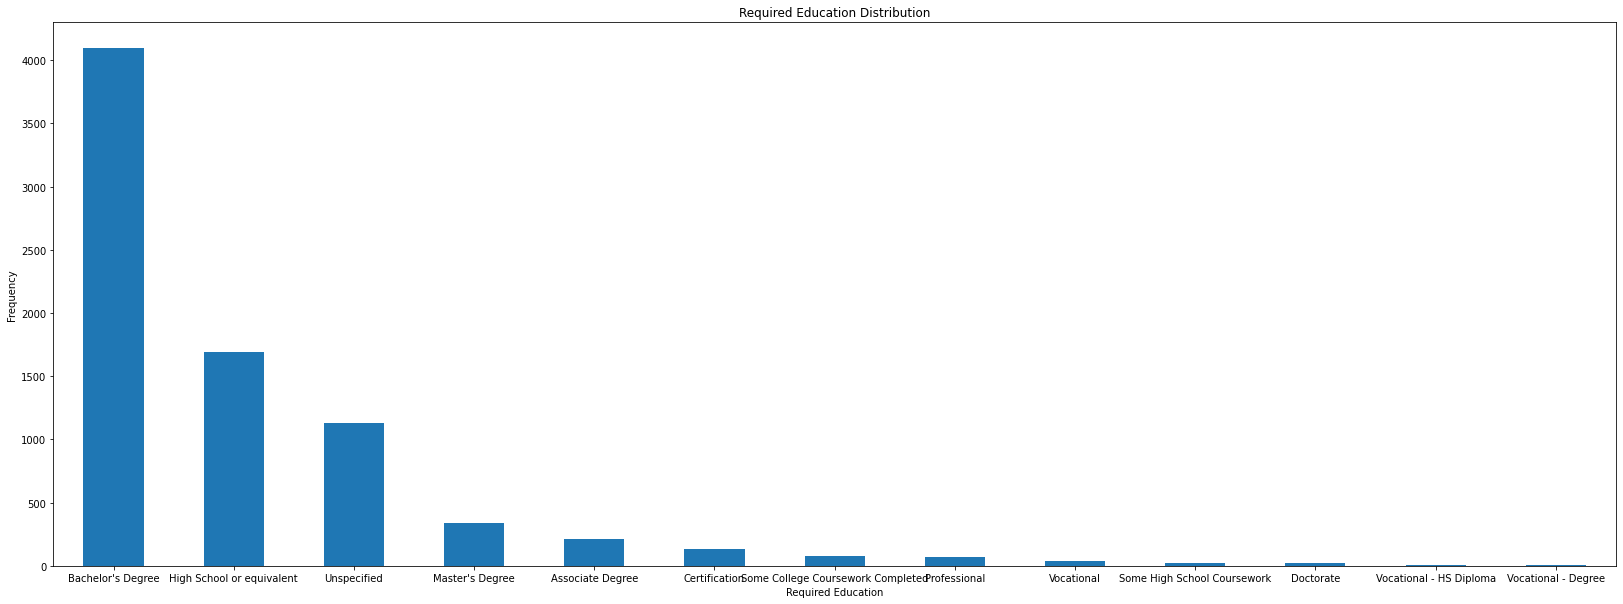

In [ ]:
# Let's visualize the distribution of required education column
count_classes = pd.value_counts(cat_train['required_education'], sort = True)
plt.figure(figsize=(28,10))
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Required Education Distribution")
plt.xticks(range(13))
plt.xlabel("Required Education")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Explore how the location column impacts Fraud column
print("The percentage of missing values in LOCATION column is  :", ((cat_train['location'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['location'].isnull()).mean()

The percentage of missing values in LOCATION column is  : 1.922539149888143 %


,fraudulent
location,
False,0.049540
True,0.050909


In [ ]:
# Explore how the department column impacts Fraud column
print("The percentage of missing values in DEPARTMENT column is  :", ((cat_train['department'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['department'].isnull()).mean()

The percentage of missing values in DEPARTMENT column is  : 64.19183445190157 %


,fraudulent
department,
False,0.053690
True,0.047266


In [ ]:
# Explore how the salary_range column impacts Fraud column
print("The percentage of missing values in SALARY RANGE column is  :", ((cat_train['salary_range'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['salary_range'].isnull()).mean()


The percentage of missing values in SALARY RANGE column is  : 83.74580536912751 %


,fraudulent
salary_range,
False,0.076129
True,0.044411


In [ ]:
# Explore how the company_profile column impacts Fraud column
print("The percentage of missing values in COMPANY PROFILE column is  :", ((cat_train['company_profile'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['company_profile'].isnull()).mean()


The percentage of missing values in COMPANY PROFILE column is  : 18.547259507829978 %


,fraudulent
company_profile,
False,0.019827
True,0.180173


In [ ]:
# Explore how the requirements column impacts Fraud column
print("The percentage of missing values in REQUIREMENTS column is  :", ((cat_train['requirements'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['requirements'].isnull()).mean()


The percentage of missing values in REQUIREMENTS column is  : 15.02376957494407 %


,fraudulent
requirements,
False,0.048293
True,0.056771


In [ ]:
# Explore how the benefits column impacts Fraud column
print("The percentage of missing values in BENEFITS column is  :", ((cat_train['benefits'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['benefits'].isnull()).mean()

The percentage of missing values in BENEFITS column is  : 40.25447427293065 %


,fraudulent
benefits,
False,0.047976
True,0.051928


In [ ]:
# Explore how the employment_type column impacts Fraud column
print("The percentage of missing values in EMPLOYMENT TYPE column is  :", ((cat_train['employment_type'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['employment_type'].isnull()).mean()

The percentage of missing values in EMPLOYMENT TYPE column is  : 19.309284116331096 %


,fraudulent
employment_type,
False,0.044360
True,0.071325


In [ ]:
# Explore how the required_experience column impacts Fraud column
print("The percentage of missing values in REQUIRED EXPERIENCE column is  :", ((cat_train['required_experience'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['required_experience'].isnull()).mean()

The percentage of missing values in REQUIRED EXPERIENCE column is  : 39.3596196868009 %


,fraudulent
required_experience,
False,0.040696
True,0.063233


In [ ]:
# Explore how the required_education column impacts Fraud column
print("The percentage of missing values in REQUIRED EDUCATION column is  :", ((cat_train['required_education'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['required_education'].isnull()).mean()

The percentage of missing values in REQUIRED EDUCATION column is  : 45.21112975391499 %


,fraudulent
required_education,
False,0.043001
True,0.057523


In [ ]:
# Explore how the description  column impacts Fraud column
print("The percentage of missing values in DESCRIPTION column is  :", ((cat_train['description'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['description'].isnull()).mean()

The percentage of missing values in DESCRIPTION column is  : 0.006991051454138702 %


,fraudulent
description,
False,0.0495
True,1.0000


In [ ]:
# Explore how the industry column impacts Fraud column
print("The percentage of missing values in INDUSTRY column is  :", ((cat_train['industry'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['industry'].isnull()).mean()

The percentage of missing values in INDUSTRY column is  : 27.265100671140942 %


,fraudulent
industry,
False,0.046809
True,0.056923


In [ ]:
# Explore how the function column impacts Fraud column
print("The percentage of missing values in FUNCTION column is  :", ((cat_train['function'].isnull().sum().sum()/ cat_train.shape[0])*100) ,'%')
cat_train.groupby(cat_train['function'].isnull()).mean()

The percentage of missing values in FUNCTION column is  : 36.07382550335571 %


,fraudulent
function,
False,0.047791
True,0.052713


#### From the explorarory analysis it is as if the missing values in the columns are random. For the base model we will encode the columns b

In [ ]:
### We create indicators to address missing values for train set
for cols in category_features: 
  cat_train[cols+'_ind'] = np.where(cat_train[cols].isnull(), 0, 1)


cat_train.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,title_ind,location_ind,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,Sales Professional - Buiding Products,"CA, BC, Langley",Langley,60000-90000,Great Customer Service from Start to FinishWha...,"Centra Windows an established, employee-owned ...",NaN,NaN,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0,1,1,1,1,1,1,0,0,1,1,0,1,1
1,Senior Software Engineer,"GB, , London",Engineering,NaN,We believe cities are complicated. And your mo...,"Londoners, New Yorkers, Parisians, and Berline...",We're looking for someone with several years' ...,NaN,Full-time,NaN,NaN,Computer Software,Engineering,0,1,1,1,0,1,1,1,0,1,0,0,1,1
2,Director of Operations (SCM & Manufacturing),"US, WA, Bellingham",Operations,50000-70000,POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,Extensive Mathematical and/or Financial Backgr...,"$50 - $70k DOE and Performance + Medical, 401k...",Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,0-0,NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1,1,1,0,1,0,1,0,0,1,1,1,1,1
4,Data Entry Assistant - Intern,"HK, , Hong Kong",Marketing,8000-14000,"At Hayes-Corp, we create the fun stuff.Â With...","Hayes Corp is looking for a patient, meticulou...",Degree in any discipline.Familiar with Microso...,"Opportunity to grow with the company, as data ...",Other,Entry level,Bachelor's Degree,Internet,Marketing,0,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Scribe,"US, ,",NaN,NaN,NaN,Works closely with an Emergency Medicine Physi...,iScribeMD is looking for enthusiastic individu...,NaN,Part-time,NaN,NaN,NaN,NaN,0,1,1,0,0,0,1,1,0,1,0,0,0,0
6,English Teacher Abroad,"US, NY, Stony Brook",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,Contract,NaN,Bachelor's Degree,Education Management,NaN,0,1,1,0,0,1,1,1,1,1,0,1,1,0
7,SAP Data Migration,"US, CA, Torrance",NaN,NaN,i28 Technologies has demonstrated expertise in...,HelloHope youâre doing goodâ¦!!! JPlease fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0
8,Inside Sales Representative,"CA, ON, London",NaN,NaN,"HRdownloads was founded in 2008, and since tha...",Inside Sales Representatives Needed for Outsta...,"The RequirementsBachelorâs degree, diploma o...",NaN,Full-time,NaN,NaN,Human Resources,Sales,0,1,1,0,0,1,1,1,0,1,0,0,1,1
9,English Teacher Abroad,"US, MO, University City",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for itÂ Love travel? ...",University degree required.Â TEFL / TESOL / CE...,See job description,Contract,NaN,Bachelor's Degree,Education Management,NaN,0,1,1,0,0,1,1,1,1,1,0,1,1,0


In [ ]:
### We create indicators to address missing values for test set
for cols in cat_test.columns: 
  cat_test[cols+'_ind'] = np.where(cat_test[cols].isnull(), 0, 1)


cat_test.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,title_ind,location_ind,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,Part-time Pizza Delivery Drivers - Wallasey,"GB, WRL, Wallasey",,NaN,Take Out Brands is a food franchise business w...,Papa Johnâs is one of the worldâs biggest ...,You must be 19 years old or above â and will...,Pay rates will be Â£6.31 / hour (21 and over)Â...,Part-time,Not Applicable,NaN,Retail,NaN,1,1,1,0,1,1,1,1,1,1,0,1,0
1,Director of Contact Center Operations,"US, AZ, Tempe",Operations,NaN,"J-Curve Technologies,Â a privately held Arizon...",J-Curve Technologies is currently in search of...,Experience and Education: Minimum of 5-8 years...,Full time employees enjoy a comprehensive bene...,Full-time,Not Applicable,NaN,NaN,Management,1,1,1,0,1,1,1,1,1,1,0,0,1
2,Technical Solution Consultant,"US, IL, Chicago",NaN,80000-105000,Retailers around the world are constantly work...,Job Title: Technical Solution ConsultantDepart...,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1,1,0,1,1,1,0,0,1,1,1,1,1
3,Vacancies At The Cafe Royal Hotel London,"GB, EAW, london",Hospitality,NaN,NaN,"AVAILABLE POSITIONS:Catering staffs, managers,...",Word Perfect;Typing;Public Speaking;Scheduling...,The Hotel Management would be responsible to c...,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,1,1,1,0,0,0,0,0
4,Car Dealer Sales Manager/Customer Service,"GR, I, Athens",NaN,NaN,Ilias Sotiropoulos first went into business as...,Full time Sales Manager/Customer Service for a...,Max 35 years old.Living close to the workplace...,NaN,Full-time,Mid-Senior level,Unspecified,Retail,Sales,1,1,0,0,1,1,1,0,1,1,1,1,1


In [ ]:
# Drop all original categrocial features
cat_train.drop(category_features, axis = 1, inplace= True)
#cat_train.drop('fraudulent', axis = 1, inplace= True)

# Test set
cat_test.drop(category_features, axis = 1, inplace= True)

cat_train.head()

,fraudulent,title_ind,location_ind,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,0,1,0,1,0,0,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1


<Figure size 720x576 with 0 Axes>

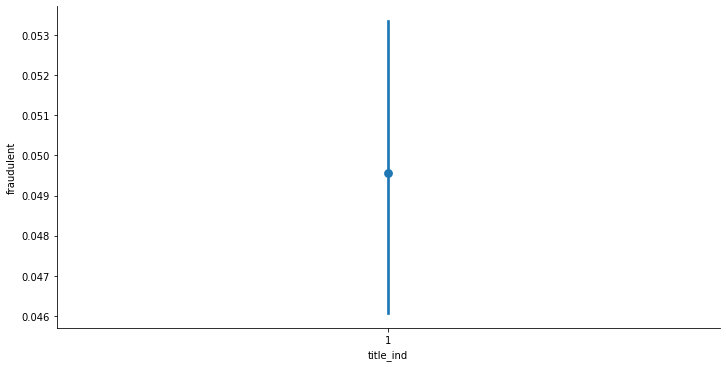

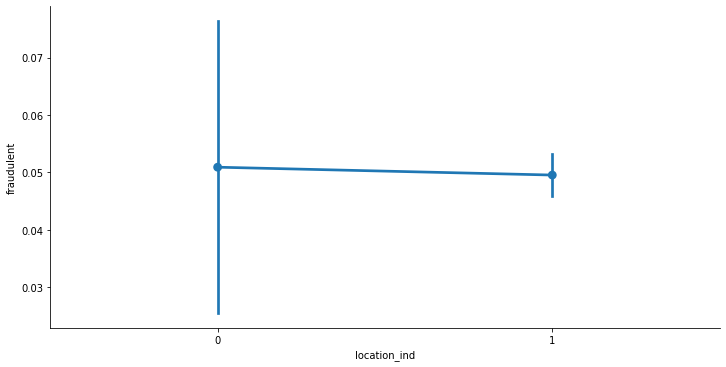

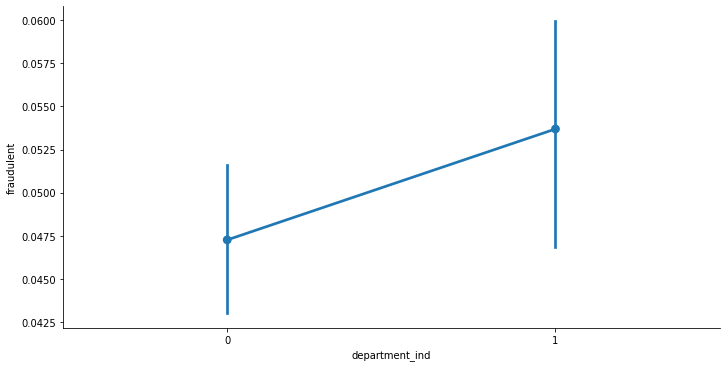

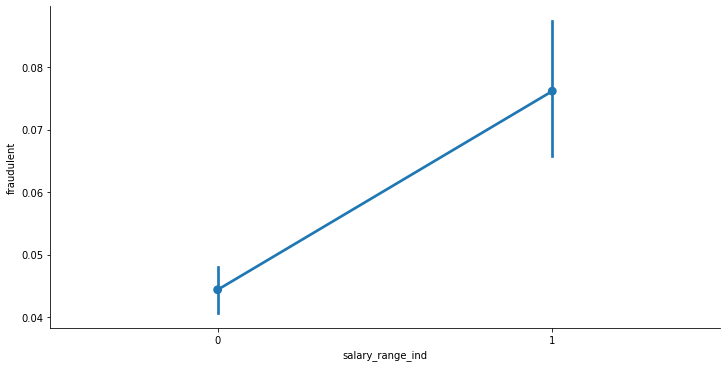

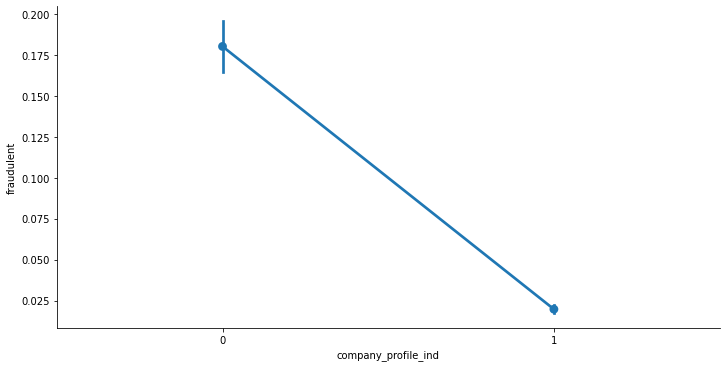

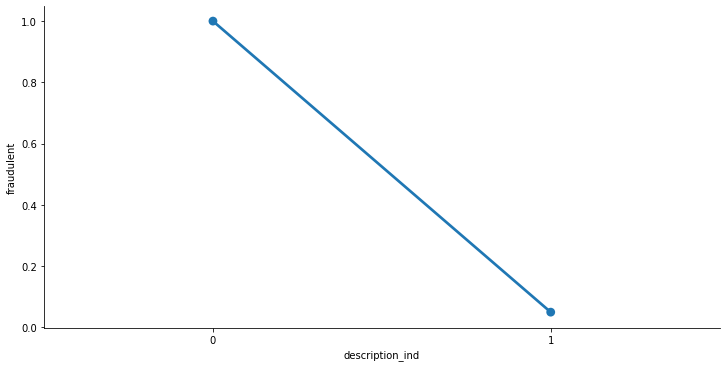

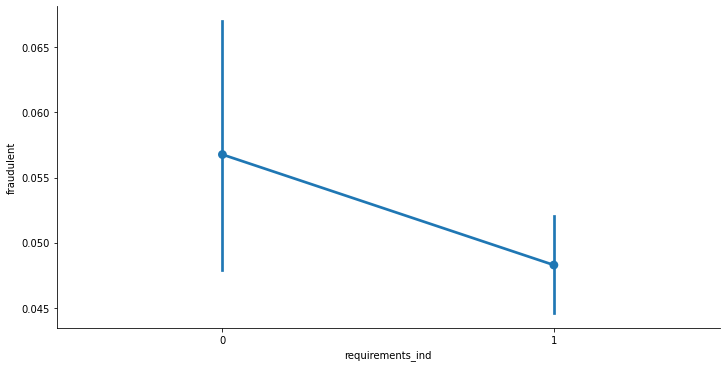

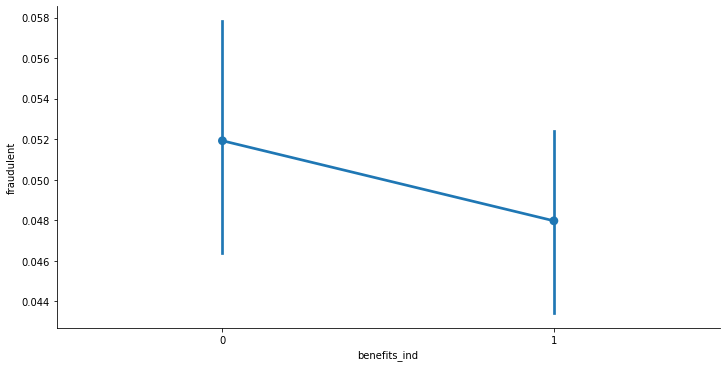

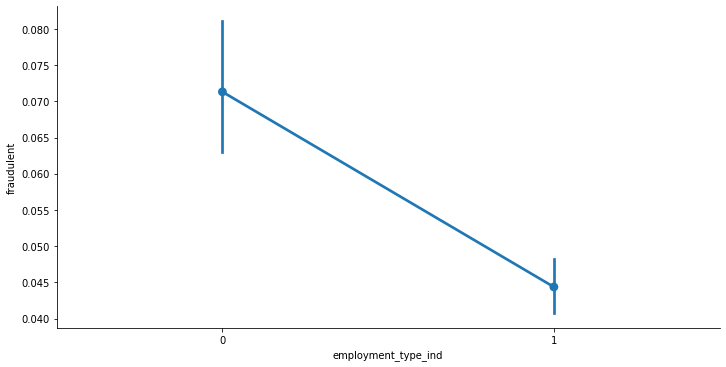

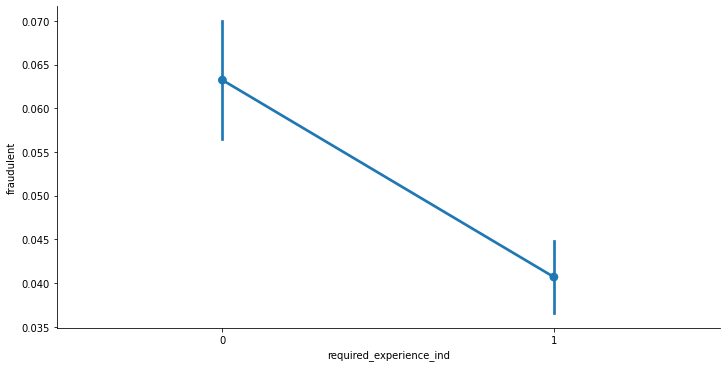

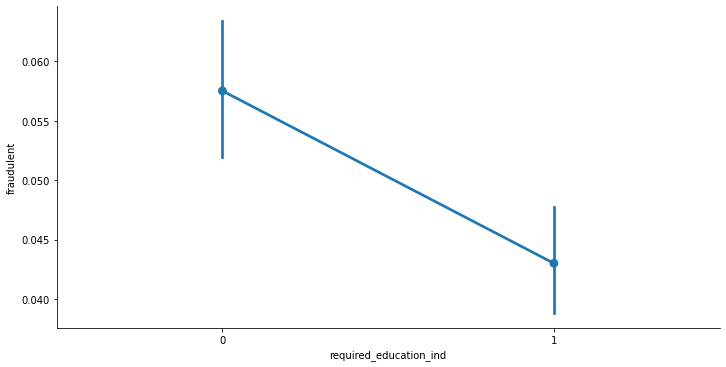

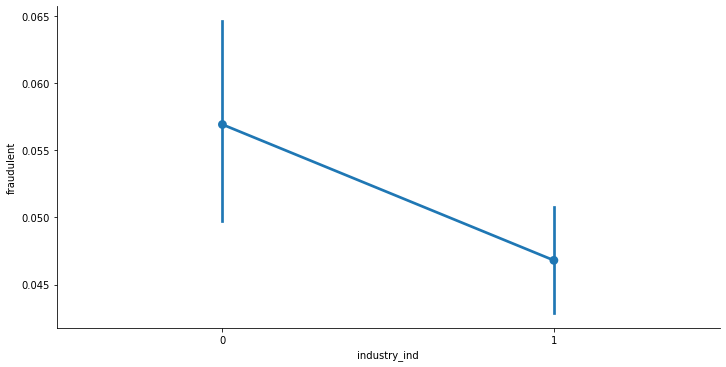

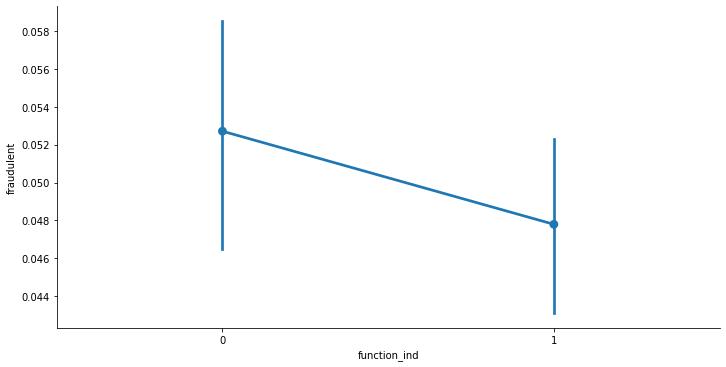

In [ ]:
for i, col in enumerate(cat_train.columns[1:]):
    plt.figure(i)
    sns.catplot(x=col, y='fraudulent', data=cat_train, kind='point', aspect=2, )

In [ ]:
# Drop columns with low impact on fraud and fraud column
cat_train.drop(['location_ind','title_ind', 'fraudulent'], axis = 1, inplace= True)

cat_eda_features = cat_train.columns
cat_test = cat_test[cat_eda_features].copy()

cat_train.head()

,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,1,1,1,1,0,0,1,1,0,1,1
1,1,0,1,1,1,0,1,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,0,1,0,1,0,0,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Combine numerical and categorical columns for train dataset
dataset_train = num_train.join(cat_train)

dataset_train.head()

,telecommuting,has_company_logo,has_questions,fraudulent,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1
1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1
2,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1
4,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Combine numerical and categorical columns for test dataset
dataset_test = num_test.join(cat_test)
dataset_test.head()

,telecommuting,has_company_logo,has_questions,department_ind,salary_range_ind,company_profile_ind,description_ind,requirements_ind,benefits_ind,employment_type_ind,required_experience_ind,required_education_ind,industry_ind,function_ind
0,0,1,1,1,0,1,1,1,1,1,1,0,1,0
1,0,1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,0,0,0,1,1,1,0,0,1,1,1,1,1
3,0,0,0,1,0,0,1,1,1,0,0,0,0,0
4,0,1,0,0,0,1,1,1,0,1,1,1,1,1


In [ ]:
# Save clean train and test dataframe
dataset_train.to_csv('df_train.csv', index= False)
dataset_test.to_csv('df_test.csv', index= False)